In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1


# STEP 1

### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
x=data[['col1','col2']]
y=data['output']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=71)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1022, 2) (256, 2) (1022,) (256,)


In [ ]:
visualise 

In [20]:
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

predictions= lgr.predict(x_train)
print("train accuracy: ", accuracy_score(y_train,predictions) )


predictions= lgr.predict(x_test)
print("test accuracy: ", accuracy_score(y_test,predictions) )

lgrscore=accuracy_score(y_test,predictions)

train accuracy:  0.5949119373776908
test accuracy:  0.6328125


### SVM

In [16]:
from sklearn import svm

**SVM with Linear Kernal**

In [95]:
svmlinear=svm.SVC(kernel='linear')
svmlinear.fit(x_train,y_train)

predictions= svmlinear.predict(x_train)
print("train accuracy: ", accuracy_score(y_train,predictions) )


predictions= svmlinear.predict(x_test)
print("test accuracy: ", accuracy_score(y_test,predictions) )

svmlinear=accuracy_score(y_test,predictions)

train accuracy:  0.5949119373776908
test accuracy:  0.6328125


**SVM with RBF Kernal**

In [96]:
svmrbf=svm.SVC(kernel='rbf')
svmrbf.fit(x_train,y_train)

predictions= svmrbf.predict(x_train)
print("train accuracy: ", accuracy_score(y_train,predictions) )


predictions= svmrbf.predict(x_test)
print("test accuracy: ", accuracy_score(y_test,predictions) )

svmRBF=accuracy_score(y_test,predictions)

train accuracy:  1.0
test accuracy:  1.0


# STEP 2

**Comparing Models**

In [80]:
accuracy=[lgrscore,svmlinear,svmRBF]
label=['Logistic Regression','SVM Linear','SVM RBF']
vis=pd.Series(comp,label)

In [81]:
df=pd.DataFrame(accuracy,label)

In [82]:
df['Models']=df.index

In [83]:
df

,0,Models
Logistic Regression,0.632812,Logistic Regression
SVM Linear,0.632812,SVM Linear
SVM RBF,1.000000,SVM RBF


In [89]:
df.reset_index(drop=True,inplace=True)

In [90]:
df

,0,Models
0,0.632812,Logistic Regression
1,0.632812,SVM Linear
2,1.000000,SVM RBF


In [91]:
df.rename(columns={0:'Accuracy_scores'},inplace=True)

In [92]:
df

,Accuracy_scores,Models
0,0.632812,Logistic Regression
1,0.632812,SVM Linear
2,1.000000,SVM RBF


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Models', ylabel='Accuracy_scores'>

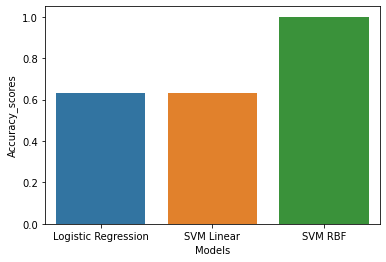

In [93]:
sns.barplot(df['Models'],df['Accuracy_scores'])

- From bar graph observed that SVM with RBF Kernal giving excellent accuracy score other than 2 models

In [104]:
import pickle

In [120]:
pickle.dump(svmrbf,open('svmRBF_Model.pickle','wb'))

In [121]:
model=pickle.load(open('svmRBF_Model.pickle','rb'))

In [122]:
data.head()

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1


In [123]:
model.predict([[-38.366669,113.000000]])

array([1], dtype=int64)

In [124]:
model

SVC()

In [146]:
svmRBF.sc

1222    0
354     1
1195    0
1214    0
1010    0
       ..
1221    0
828     0
304     1
40      1
110     1
Name: output, Length: 256, dtype: int64

In [152]:
data

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1
...,...,...,...
1273,-7.017043,3.026211,0
1274,5.633331,5.000000,0
1275,-13.501376,-12.774656,0
1276,-13.451631,0.015515,0


In [154]:
model.predict([[-38.366669,113.000000],[18.634295,-6.581324]])

array([1, 0], dtype=int64)